# Supervised ML : Classification : Logistic Regression

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$
 
**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:
 
$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$
 
This is called the **logit function**.
 
Probability is sometimes written as pi:
 
$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$
 
The equation can be rearranged into the **logistic function**:
 
$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:
 
 - Logistic regression outputs the **probabilities of a specific class**
 - Those probabilities can be converted into **class predictions**
 
The **logistic function** has some nice properties:

 - Takes on an "s" shape
 - Output is bounded by 0 and 1

## Imports

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import warnings 
warnings.filterwarnings('ignore')

## The Breast Cancer Dataset

In [0]:
# load data
data = load_breast_cancer()
X = data.data
y = data.target
y_labels = np.array(['malignant' if item == 0 else 'benign' for item in y])

In [3]:
from collections import Counter

Counter(y_labels)

Counter({'benign': 357, 'malignant': 212})

### Details

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

### Prepare the Dataset for Consumption

In [0]:
df = pd.concat([pd.DataFrame(X, columns=data.feature_names), 
                pd.DataFrame(y_labels.reshape(-1,1), columns=['has cancer'])], axis=1)

In [6]:
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,has cancer
357,13.870,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.02088,0.1424,0.05883,0.2543,1.3630,1.737,20.74,0.005638,0.007939,0.005254,0.006042,0.01544,0.002087,15.110,25.58,96.74,694.4,0.1153,0.10080,0.05285,0.05556,0.2362,0.07113,benign
343,19.680,21.68,129.90,1194.0,0.09797,0.13390,0.18630,0.11030,0.2082,0.05715,0.6226,2.2840,5.173,67.66,0.004756,0.033680,0.043450,0.018060,0.03756,0.003288,22.750,34.66,157.60,1540.0,0.1218,0.34580,0.47340,0.22550,0.4045,0.07918,malignant
252,19.730,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.09740,0.1733,0.06697,0.7661,0.7800,4.115,92.81,0.008482,0.050570,0.068000,0.019710,0.01467,0.007259,25.280,25.59,159.80,1933.0,0.1710,0.59550,0.84890,0.25070,0.2749,0.12970,malignant
292,12.950,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,0.2094,0.7636,1.231,17.67,0.008725,0.020030,0.023350,0.011320,0.02625,0.004726,13.740,19.93,88.81,585.4,0.1483,0.20680,0.22410,0.10560,0.3380,0.09584,benign
282,19.400,18.18,127.20,1145.0,0.10370,0.14420,0.16260,0.09464,0.1893,0.05892,0.4709,0.9951,2.903,53.16,0.005654,0.021990,0.030590,0.014990,0.01623,0.001965,23.790,28.65,152.40,1628.0,0.1518,0.37490,0.43160,0.22520,0.3590,0.07787,malignant
538,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,0.1870,0.07285,0.3777,1.4620,2.492,19.14,0.012660,0.009692,0.000000,0.000000,0.02882,0.006872,9.077,30.92,57.17,248.0,0.1256,0.08340,0.00000,0.00000,0.3058,0.09938,benign
219,19.530,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,0.7392,1.3210,4.722,109.90,0.005539,0.026440,0.026640,0.010780,0.01332,0.002256,27.900,45.41,180.20,2477.0,0.1408,0.40970,0.39950,0.16250,0.2713,0.07568,malignant
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,0.2200,0.9823,1.484,16.51,0.005518,0.015620,0.019940,0.007924,0.01799,0.002484,13.590,25.22,86.60,564.2,0.1217,0.17880,0.19430,0.08211,0.3113,0.08132,benign
446,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,0.3897,1.0770,2.873,43.95,0.004714,0.020150,0.036970,0.011100,0.01237,0.002556,21.530,38.54,145.40,1437.0,0.1401,0.37620,0.63990,0.19700,0.2972,0.09075,malignant
314,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,0.3368,2.7770,2.222,17.81,0.020750,0.014030,0.000000,0.000000,0.06146,0.006820,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116,benign


### Exploratory Analysis

### Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine the distribution of each type of record
* Encode the activity label as an integer

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

### Classification Targets/Output

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

### Class Distribution

In [9]:
df['has cancer'].value_counts()

benign       357
malignant    212
Name: has cancer, dtype: int64

## Train-Test Split

### Question 2

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.3, random_state=42)
print('Training dataset shape:', X_train.shape, '\tTest dataset shape:', X_test.shape)

Training dataset shape: (398, 30) 	Test dataset shape: (171, 30)


## Modeling

### Question 3

* Fit a logistic regression model without any regularization using all of the features. 
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=100, solver='liblinear')

In [12]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear', max_iter=100).fit(X_train, y_train)

In [0]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear', max_iter=100).fit(X_train, y_train)

### Understand Coefficients

### Question 4

Compare the magnitudes of the coefficients for each of the models. 

In [15]:
# Combine all the coefficients into a dataframe
coefficients = pd.DataFrame({'lr': lr.coef_[0], 'l1': lr_l1.coef_[0], 'l2': lr_l2.coef_[0]})
coefficients.head(10)

,lr,l1,l2
0,-2.038245,-1.019625,-5.537228
1,-0.155576,-0.089434,-0.310132
2,0.102256,-0.104957,0.587009
3,0.003794,0.013139,0.017725
4,0.113067,0.000000,0.514848
5,0.389714,0.000000,1.094062
6,0.596462,0.000000,2.028991
7,0.304108,53.114779,1.321519
8,0.174986,0.000000,0.816247
9,0.028549,0.000000,0.070778


In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

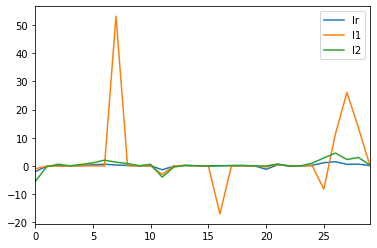

In [17]:
coefficients.plot(y=["lr", "l1", "l2"], kind="line")

### Predict on Test Set

### Question 5

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [0]:
test_predictions = lr.predict(X_test)

In [19]:
test_predictions[:10]

array(['benign', 'malignant', 'malignant', 'benign', 'benign',
       'malignant', 'malignant', 'malignant', 'benign', 'benign'],
      dtype='<U9')

## Model Evaluation

### Question 6
For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

In [0]:
from sklearn import metrics


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

### Evaluation Stats

In [21]:
get_metrics(true_labels=y_test, predicted_labels=test_predictions)

Accuracy: 0.9649
Precision: 0.965
Recall: 0.9649
F1 Score: 0.9648


In [22]:
test_predictions = lr_l1.predict(X_test)
get_metrics(true_labels=y_test, predicted_labels=test_predictions)

Accuracy: 0.9708
Precision: 0.9709
Recall: 0.9708
F1 Score: 0.9708


In [23]:
test_predictions = lr_l2.predict(X_test)
get_metrics(true_labels=y_test, predicted_labels=test_predictions)

Accuracy: 0.9649
Precision: 0.9649
Recall: 0.9649
F1 Score: 0.9649


### Confusion Matrix

In [24]:
total_classes = len(data.target_names)
level_labels = [total_classes*[0], list(range(total_classes))]

cm = metrics.confusion_matrix(y_true=y_test, y_pred=test_predictions, 
                                  labels=data.target_names)
cm_frame = pd.DataFrame(data=cm, 
                        columns=pd.MultiIndex(levels=[['Predicted:'], data.target_names], 
                                              codes=level_labels), 
                        index=pd.MultiIndex(levels=[['Actual:'], data.target_names], 
                                            codes=level_labels)) 
cm_frame

Predicted:       
                   malignant benign
Actual: malignant         60      3
        benign             3    105

In [25]:
print(metrics.classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

      benign       0.97      0.97      0.97       108
   malignant       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## Feature Selection

### Question 7
 Identify highly correlated columns and drop those columns before building models

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

#threshold with .7

sel = VarianceThreshold(threshold=(.7 * (1 - .7)))

data2 = df.copy()
data_new = pd.DataFrame(sel.fit_transform(data2.loc[:,~data2.columns.isin(['has cancer'])]))

# train-test split
X_new,X_test_new, Y_new,Y_test_new = train_test_split(data_new, data2['has cancer'].tolist(), test_size=0.3, random_state=42)
print('Training dataset shape:', X_new.shape, '\tTest dataset shape:', X_test_new.shape)

Training dataset shape: (398, 11) 	Test dataset shape: (171, 11)


### Question 8

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix